In [16]:
import pandas as pd
import re
import string
import seaborn as sns

fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")
fake["label"] = 0          #for fake news
real["label"] = 1          #for real news
mat = pd.concat([real, fake])    #merging two datasets
mat = mat.sample(frac = 1)     #shuffling the dataset
mat.reset_index(inplace = True)    #adding new index
sns.countplot(x = 'subject', hue = 'label', data = mat)
mat = mat.drop(["title", "subject", "date","index"], axis = 1)    #droping unnecessary tables 
models = []



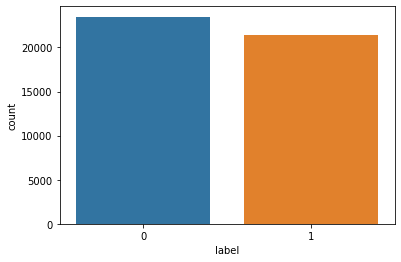

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'label', data = mat)

In [2]:
for i in range(len(mat['text'])):      # data preprocessing
    mat.at[i, 'text'] = mat.at[i, 'text'].lower()
    mat.at[i, 'text'] = re.sub('[^a-zA-Z]',' ', mat.at[i, 'text'])
    mat.at[i, 'text'] = mat.at[i, 'text'].split()
    mat.at[i, 'text'] = ' '.join(mat.at[i, 'text'])

In [3]:
mat.head()

,text,label
0,in one of his regular appearances on the imus ...,0
1,washington reuters president donald trump s so...,1
2,where s george soros when his top fact checker...,0
3,reuters u s president donald trump and afghan ...,1
4,member of the us backed free syrian army alepp...,0


In [5]:
from sklearn.model_selection import train_test_split

x = mat['text']
y = mat['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words = 'english', max_features = 350)
xn_train = vectorization.fit_transform(x_train)
xn_test = vectorization.fit_transform(x_test)

In [ ]:
print(xn_train.shape)
print(x_train.shape)

(33673, 350)
(33673,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

FakeNews_model = MultinomialNB().fit(xn_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

predictions = FakeNews_model.predict(xn_test)
models.append(predictions)
print(predictions)
print(classification_report(y_test, predictions))

[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      5829
           1       0.82      0.64      0.72      5396

    accuracy                           0.76     11225
   macro avg       0.77      0.76      0.75     11225
weighted avg       0.77      0.76      0.76     11225



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words = 'english', max_features = 350)
xnLR_train = vectorization.fit_transform(x_train)
xnLR_test = vectorization.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

FakeNewsLR_model = LogisticRegression().fit(xnLR_train, y_train)


In [ ]:
predictions_lr = FakeNewsLR_model.predict(xnLR_test)
models.append(predictions_lr)
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      5829
           1       0.96      0.83      0.89      5396

    accuracy                           0.90     11225
   macro avg       0.91      0.90      0.90     11225
weighted avg       0.91      0.90      0.90     11225



In [6]:
#random forest
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words = 'english', max_features = 350)
x_Random_train = vectorization.fit_transform(x_train)
x_Random_test = vectorization.fit_transform(x_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
model_random= RandomForestClassifier(max_depth=2, random_state=0)
model_random.fit(x_Random_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [9]:
from sklearn.metrics import classification_report
predict2=model_random.predict(x_Random_test)
models.append(predict2)
print(classification_report(y_test, predict2))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70      5894
           1       0.68      0.49      0.57      5331

    accuracy                           0.65     11225
   macro avg       0.66      0.64      0.63     11225
weighted avg       0.65      0.65      0.64     11225



In [10]:
# Decision Tree Classifier

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words = 'english', max_features = 350)
x_decision_train = vectorization.fit_transform(x_train)
x_decision_test = vectorization.fit_transform(x_test)

In [11]:
from sklearn import tree
model_decision=tree.DecisionTreeClassifier()
model_decision.fit(x_decision_train,y_train)

DecisionTreeClassifier()

In [12]:
predict3=model_decision.predict(x_decision_test)
models.append(predict3)
print(classification_report(y_test, predict3))

              precision    recall  f1-score   support

           0       0.50      0.82      0.62      5894
           1       0.31      0.09      0.14      5331

    accuracy                           0.47     11225
   macro avg       0.41      0.46      0.38     11225
weighted avg       0.41      0.47      0.39     11225



In [13]:
#MLP

from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words = 'english', max_features = 350)
x_MLP_train = vectorization.fit_transform(x_train)
x_MLP_test = vectorization.fit_transform(x_test)


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words = 'english', max_features = 350)
x_grid_train = vectorization.fit_transform(x_train)
x_grid_test = vectorization.fit_transform(x_test)

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from sklearn.neural_network import MLPClassifier

grid=MLPClassifier()
model_grid=GridSearchCV(grid,{'activation':['logistic','tanh','relu','identity'],'hidden_layer_sizes': [(100,),(256, 32)], 'solver':['lbfgs', 'sgd', 'adam']},n_jobs=-1,cv=2)
model_grid.fit(x_grid_train,y_train)
print("Best parameters: ", model_grid.best_params_)

Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (256, 32), 'solver': 'adam'}


In [ ]:
model_mlp = model_mlp = MLPClassifier(hidden_layer_sizes=(100,), activation = 'logistic', solver = 'sgd')
model_mlp.fit(x_MLP_train,y_train)

MLPClassifier(hidden_layer_sizes=(256, 128, 32), max_iter=300, random_state=1)

In [ ]:
predict4=model_mlp.predict(x_MLP_test)
print(classification_report(y_test, predict4))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      5829
           1       0.97      0.70      0.81      5396

    accuracy                           0.85     11225
   macro avg       0.88      0.84      0.84     11225
weighted avg       0.87      0.85      0.84     11225



In [ ]:
# SVM 
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words = 'english', max_features = 350)
x_SVM_train = vectorization.fit_transform(x_train)
x_SVM_test = vectorization.fit_transform(x_test)


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
model_SVM = SVC(gamma='auto')
model_SVM.fit(x_SVM_train,y_train)


SVC(gamma='auto')

In [ ]:
predict5=model_SVM.predict(x_SVM_test)
models.append(predict5)
print(classification_report(y_test, predict5))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      5829
           1       0.91      0.83      0.87      5396

    accuracy                           0.88     11225
   macro avg       0.88      0.88      0.88     11225
weighted avg       0.88      0.88      0.88     11225



In [ ]:
import numpy as np    #ensembling using averaging the predictions of different models
models = np.array(models)
n = len(models)
su = np.sum(models, axis = 0)
su = su/n
rnd = np.vectorize(round)
su = rnd(su)
print(classification_report(y_test, su))

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer(stop_words = 'english', max_features = 350)
x_VC_train = vectorization.fit_transform(x_train)
x_VC_test = vectorization.fit_transform(x_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

SVM_model = SVC(gamma='auto')
mlp_model = MLPClassifier(hidden_layer_sizes=(256,128,32),random_state=1, max_iter=300)
decision_model = tree.DecisionTreeClassifier()
random_model= RandomForestClassifier(max_depth=2, random_state=0)
LR_model = LogisticRegression()
NB_model = MultinomialNB()

est = [('des', decision_model), ('rf', random_model), ('lr', LR_model)]
ensembled_model = VotingClassifier(estimators = est, voting = 'hard')
ensembled_model.fit(x_VC_train, y_train)

VotingClassifier(estimators=[('des', DecisionTreeClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=2,
                                                     random_state=0)),
                             ('lr', LogisticRegression())])

In [19]:
from sklearn.metrics import classification_report

ensembled_predict=ensembled_model.predict(x_VC_test)
print(classification_report(y_test, ensembled_predict))

              precision    recall  f1-score   support

           0       0.56      0.81      0.66      5894
           1       0.58      0.29      0.38      5331

    accuracy                           0.56     11225
   macro avg       0.57      0.55      0.52     11225
weighted avg       0.57      0.56      0.53     11225

